In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

sns.set_style('darkgrid')

In [2]:
df_origin = pd.read_csv('./dataset.csv')

In [3]:
df_origin.head()

,text,raw_data_id
0,<|user|> What is high blood pressure? <|eos|> ...,0
1,<|user|> What are the risks of high blood pres...,0
2,<|user|> How is high blood pressure diagnosed?...,0
3,<|user|> What are the lifestyle changes that c...,0
4,<|user|> What are the medicines used to contro...,0


In [4]:
df = df_origin.drop(columns=['raw_data_id'], axis=1)

In [5]:
df.head()

,text
0,<|user|> What is high blood pressure? <|eos|> ...
1,<|user|> What are the risks of high blood pres...
2,<|user|> How is high blood pressure diagnosed?...
3,<|user|> What are the lifestyle changes that c...
4,<|user|> What are the medicines used to contro...


In [6]:
for i in range(5):
    print(f'{df.loc[i, "text"]}\n\n' + '*' * 50 + '\n')

<|user|> What is high blood pressure? <|eos|> <|ai|> High blood pressure is a condition where the force at which your heart pumps blood around your body is high. It is recorded with 2 numbers, the systolic pressure and the diastolic pressure, both measured in millimetres of mercury (mmHg).
References:
- https://www.nhs.uk/conditions/Blood-pressure-(high)/Pages/Introduction.aspx <|eos|> <|eod|>

**************************************************

<|user|> What are the risks of high blood pressure? <|eos|> <|ai|> Persistent high blood pressure can put extra strain on your blood vessels, heart, and other organs, such as the brain, kidneys, and eyes. It can increase your risk of serious and potentially life-threatening health conditions, such as heart disease, heart attacks, strokes, heart failure, peripheral arterial disease, aortic aneurysms, kidney disease, and vascular dementia.
References:
- https://www.nhs.uk/conditions/Blood-pressure-(high)/Pages/Introduction.aspx <|eos|> <|eod|>

*

In [7]:
df['text'] = df['text'].str.split('References:').str[0].str.strip() + ' <|eos|> <|eod|>'

In [8]:
for i in range(5):
    print(f'{df.loc[i, "text"]}\n\n' + '*' * 50 + '\n')

<|user|> What is high blood pressure? <|eos|> <|ai|> High blood pressure is a condition where the force at which your heart pumps blood around your body is high. It is recorded with 2 numbers, the systolic pressure and the diastolic pressure, both measured in millimetres of mercury (mmHg). <|eos|> <|eod|>

**************************************************

<|user|> What are the risks of high blood pressure? <|eos|> <|ai|> Persistent high blood pressure can put extra strain on your blood vessels, heart, and other organs, such as the brain, kidneys, and eyes. It can increase your risk of serious and potentially life-threatening health conditions, such as heart disease, heart attacks, strokes, heart failure, peripheral arterial disease, aortic aneurysms, kidney disease, and vascular dementia. <|eos|> <|eod|>

**************************************************

<|user|> How is high blood pressure diagnosed? <|eos|> <|ai|> The only way of knowing whether you have high blood pressure is to 

In [9]:
df['len'] = df['text'].str.split().apply(len)

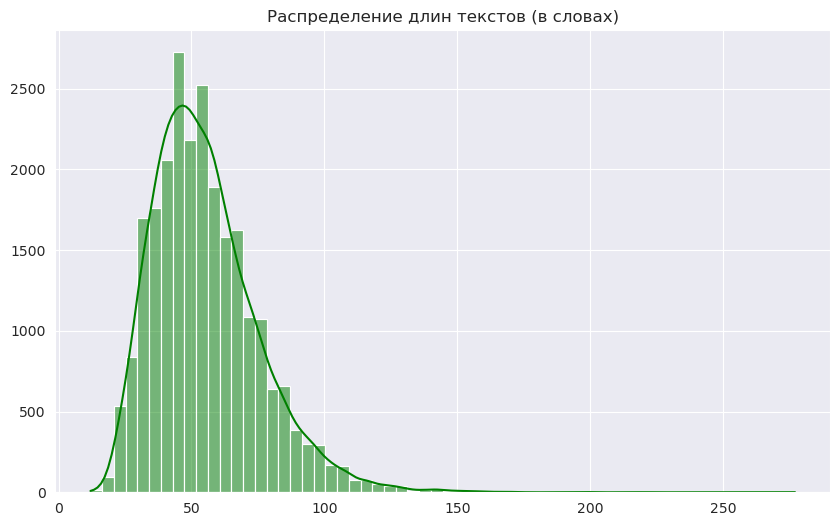

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='len', kde=True, bins=60, color='green')
plt.title('Распределение длин текстов (в словах)')
plt.yticks(None)
plt.xlabel(None)
plt.ylabel(None);

In [11]:
df.shape

(24665, 2)

In [12]:
df[df['len'] > 160]

,text,len
1410,<|user|> What should I do if I miss a dose of ...,198
2991,<|user|> How should I store food for my child?...,161
6633,<|user|> What are the symptoms of a heart atta...,169
7044,<|user|> What are the main steps for doing a r...,169
9885,<|user|> How does the cervical secretion monit...,173
12862,"<|user|> What are ticks, and how can I avoid t...",167
13553,<|user|> What should I do to prepare for surge...,161
14215,<|user|> How do I treat someone who has a low ...,167
14344,<|user|> What financial support is available f...,165
14768,<|user|> What are the stages of melanoma? <|e...,220


In [13]:
df = df[df['len'] < 160]

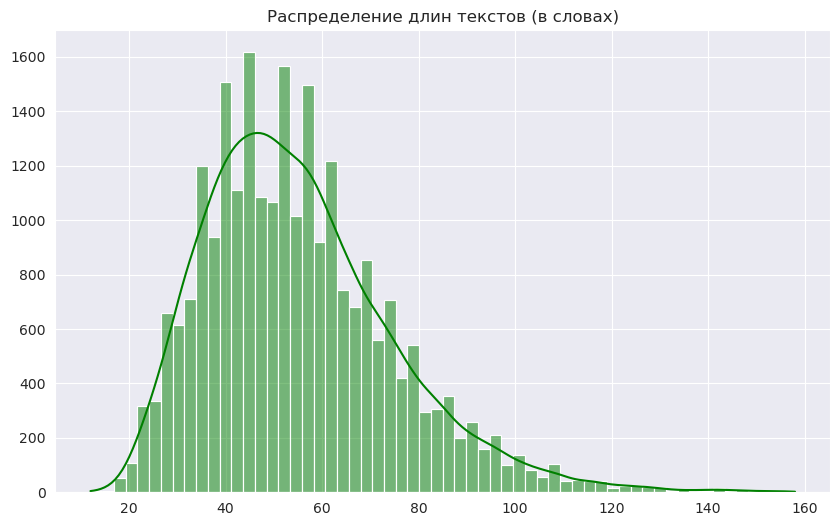

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='len', kde=True, bins=60, color='green')
plt.title('Распределение длин текстов (в словах)')
plt.yticks(None)
plt.xlabel(None)
plt.ylabel(None);

In [18]:
from transformers import AutoModelForCausalLM, BitsAndBytesConfig, AutoTokenizer
from peft import LoraConfig, get_peft_model

checkpoint = "meta-llama/Meta-Llama-3-8B"

bnb = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForCausalLM.from_pretrained(checkpoint, quantization_config=bnb, device_map="auto")

lora = LoraConfig(
    r=8,
    lora_alpha=16,
    lora_dropout=0.05,
    target_modules=["q_proj","k_proj","v_proj","o_proj"]
)

model = get_peft_model(model, lora)
model.gradient_checkpointing_enable()

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3-8B.
403 Client Error. (Request ID: Root=1-68b45d33-2afbac151d04767529801410;a168e723-9fed-479a-aa11-fd7792d408ce)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3-8B/resolve/main/config.json.
Your request to access model meta-llama/Meta-Llama-3-8B has been rejected by the repo's authors.